# Laguage detection task


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### In this task objects will be words either in English or in French, and you will have to implement K-NN classifier predicting the language of each word by its Levenstein (edit) distance to the words in the training set.

* Download python wheel Python-Levenstein from <http://www.lfd.uci.edu/~gohlke/pythonlibs/#python-levenshtein>
* Install it with pip intall [wheel-name].
* Levenstein distance can now be computed as Levenshtein.distance(source, target)

In [3]:
import Levenshtein

In [4]:
import sklearn as skl
import pandas as pd

In [5]:
with open('Data/en.txt') as f:
    english = f.readlines()
    
with open('Data/fr.txt') as f:
    french = f.readlines()

In [6]:
len(english), len(french)

(164144, 191448)

In [7]:
random.seed(0)

In [8]:
english[:4]

['twist\n', 'author\n', 'charles\n', 'dickens\n']

In [9]:
french[:4]

['des\n', 'mati\n', 'res\n', 'chapitre\n']

In [10]:
random.seed(0)

In [11]:
random.shuffle(english)

In [12]:
random.shuffle(french)

#### Forming train and test sets your the task.

In [13]:
N1 = 15000
N2 = 500
X_train = english[:N1]+french[:N1]
Y_train = [1]*N1 + [2]*N1
X_test = english[N1:N1+N2]+french[N1:N1+N2]
Y_test = [1]*N2 + [2]*N2

In [14]:
inds = arange(len(X_train)) 
inds = random.permutation(inds)
X_train = [X_train[ind] for ind in inds]
Y_train = [Y_train[ind] for ind in inds]

inds = arange(len(X_test))
inds = random.permutation(inds)
X_test = [X_test[ind] for ind in inds]
Y_test = [Y_test[ind] for ind in inds]

In [15]:
# Cleaning datasets

X_train = [w.replace('\n', '') for w in X_train]
X_test = [w.replace('\n', '') for w in X_test]

In [16]:
Levenshtein.distance("translation", "application")

6

#### Implement KNN class having constructor, fit(X,Y), predict_one(x) and predict(X) methods.

* constructor should have parameter K
* predict_one(x) predicts class for single object
* predict(X) predicts class for each row of X

You will need this class, because default implementation of K-NN 
requires objects to be numeric vectors and your objects are strings.

In [17]:
class KNN:
    def __init__(self, K=1):
        self.k = K
        
    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y
    
    def predict_one(self, x):     
        df = self._build_dataframe()
        
        distances = [Levenshtein.distance(word, x) for word in self.X_train]
        df['distance'] = pd.Series(distances)
            
        df = df.sort_values('distance')
        neighbours = df.head(self.k)
        grouped = neighbours.groupby('label').count()
        
        return grouped['word'].idxmax()
        
    def predict(self, X):
        predictions_list = [self.predict_one(word) for word in X]
        result = pd.DataFrame(X, columns=['word'])
        result['predicted'] = pd.Series(predictions_list)
            
        return result
    
    def _build_dataframe(self):
        base_df = pd.DataFrame(self.X_train)
        base_df.columns = ['word']
        base_df['label'] = pd.Series(self.Y_train)

        return base_df

In [18]:
K=[1,3,5,7,11,21]
knns = []

for i in K:
    tmp = KNN(i)
    tmp.fit(X_train, Y_train)
    knns.append(tmp)
    

In [19]:
%%time

test_data = [] 
for knn in knns:
    test_data.append(knn.predict(X_test))

CPU times: user 3min 4s, sys: 1.13 s, total: 3min 6s
Wall time: 3min 7s


In [20]:
# Preparing dataframe for comparing predicted and actual labels

for data in test_data:
    data['actual'] = pd.Series(Y_test)


In [21]:
accuracy = []
for data in test_data:
    pred_list = data['predicted']
    act_list = data['actual']
    diff = 0
    
    for i,j in zip(pred_list, act_list):
        if i != j:
            diff += 1
    accuracy.append((1000 - diff) / 1000)

#### For K=[1,3,5,7,11,21] estimate accuracy of your KNN and plot the dependency between K and accuracy.

In [22]:
accuracy

[0.917, 0.925, 0.912, 0.902, 0.895, 0.881]

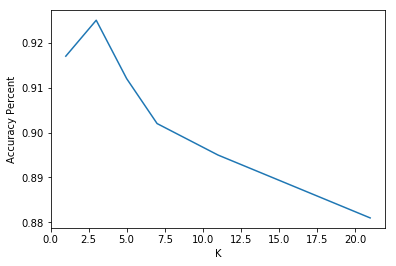

In [23]:
plt.xlabel('K')
plt.ylabel('Accuracy Percent')
plt.plot(K, accuracy)

#### What value of K is optimal? Explain

K = 3 is optimal for this situation. It is large enough so a level of noise in the data is minimized. Also it is small enough so samples of the other class are not inlcuded